12 steps to Navier–Stokes
=====
***

Did you make it this far? This is the last step! How long did it take you to write your own Navier–Stokes solver in Julia following this interactive module? Let us know!

Step 12: Channel Flow with Navier–Stokes
----
***

The only difference between this final step and Step 11 is that we are going to add a source term to the $u$-momentum equation, to mimic the effect of a pressure-driven channel flow. Here are our modified Navier–Stokes equations:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)+F$$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)
$$

### Discretized equations

With patience and care, we write the discretized form of the equations. It is highly recommended that you write these in your own hand, mentally following each term as you write it.

The $u$-momentum equation:

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x} \\
& \qquad +\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)+F_{i,j}
\end{split}
$$

The $v$-momentum equation:

$$
\begin{split}
& \frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y} \\
& \qquad +\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

And the pressure equation:

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2} + \frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

As always, we need to re-arrange these equations to the form we need in the code to make the iterations proceed. 

For the $u$- and $v$ momentum equations, we isolate the velocity at time step `n+1`:

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right] \\
& + \Delta t F
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right]
\end{split}
$$

And for the pressure equation, we isolate the term $p_{i,j}^n$ to iterate in pseudo-time:

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2(\Delta x^2+\Delta y^2)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t} \left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} + \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

The initial condition is $u, v, p=0$ everywhere, and at the boundary conditions are:

$u, v, p$ are periodic on $x=0,2$

$u, v =0$ at $y =0,2$

$\frac{\partial p}{\partial y}=0$ at $y =0,2$

$F=1$ everywhere.

Let's begin by importing our usual run of libraries:


In [1]:
using Plots

In step 11, we isolated a portion of our transposed equation to make it easier to parse and we're going to do the same thing here.  One thing to note is that we have periodic boundary conditions throughout this grid, so we need to explicitly calculate the values at the leading and trailing edge of our `u` vector.

In [2]:
function build_up_b(b, ρ, Δt, Δx, Δy, u, v)
    row,col = size(u)

    for i ∈ 1:col
        for j ∈ 1:col             
            if j == 1 || j == row
               continue
            elseif i == 1
               # Period BC Pressure @ x = 0
               b[j,i] = (ρ * (1/Δt) * ((u[j,i+1] - u[j,end]) / (2*Δx) + (v[j+1,i] - v[j-1,i]) / (2*Δy)) - 
                            ((u[j,i+1] - u[j,end]) / (2*Δx))^2 - 
                            2 * ((u[j+1,i] - u[j-1,i]) / (2*Δy) * 
                                (v[j,i+1] - v[j,end]) / (2*Δx)) -
                                ((v[j+1,i] - v[j-1,i]) / (2*Δy))^2)
            elseif i == col
               # Period BC Pressure @ x = 2
               b[j,i] = (ρ * (1/Δt) * ((u[j,1] - u[j,i-1]) / (2*Δx) + (v[j+1,i] - v[j-1,i]) / (2*Δy)) - 
                            ((u[j,1] - u[j,i-1]) / (2*Δx))^2 - 
                            2 * ((u[j+1,i] - u[j-1,i]) / (2*Δy) * 
                                (v[j,1] - v[j,i-1]) / (2*Δx)) -
                                ((v[j+1,i] - v[j-1,i]) / (2*Δy))^2)

            else
               b[j,i] = (ρ * (1/Δt) * ((u[j,i+1] - u[j,i-1]) / (2*Δx) + (v[j+1,i] - v[j-1,i]) / (2*Δy)) - 
                            ((u[j,i+1] - u[j,i-1]) / (2*Δx))^2 - 
                            2 * ((u[j+1,i] - u[j-1,i]) / (2*Δy) * 
                                (v[j,i+1] - v[j,i-1]) / (2*Δx)) -
                                ((v[j+1,i] - v[j-1,i]) / (2*Δy))^2)
     
            end
        end
    end
    return b
end

build_up_b (generic function with 1 method)

We'll also define a Pressure Poisson iterative function, again like we did in Step 11.  Once more, note that we have to include the periodic boundary conditions at the leading and trailing edge.  We also have to specify the boundary conditions at the top and bottom of our grid.  

In [3]:
function pressure_poisson_periodic(p, Δx, Δy, b)
    row, col = size(p)
    pⁿ = similar(p)

    for n in 1:nit
        pⁿ = copy(p)
        for i ∈ 1:col
            for j ∈ 1:row

                if j == 1
                    # Lower Wall BC
                    p[j,i] = p[j+1,i] # dp/dy = 0 at y = 0

                elseif j == row
                    # Upper Wall BC
                    p[j,i] = p[j-1,i] # dp/dy = 0 at y = 2

                elseif i == 1
                    # Periodic BC Pressure @ x = 0
                    p[j,i] = ((pⁿ[j,i+1] + pⁿ[j,end])*Δy^2 + 
                            (pⁿ[j+1,i] + pⁿ[j-1,i])*Δx^2 / (2*(Δx^2+Δy^2)) -
                            ((Δx^2*Δy^2)/(2*(Δx^2 + Δy^2))) * b[j,i])

                elseif i == col
                    # Periodic BC Pressure @ x = 2
                    p[j,i] = ((pⁿ[j,1] + pⁿ[j,i-1])*Δy^2 + 
                            (pⁿ[j+1,i] + pⁿ[j-1,i])*Δx^2 / (2*(Δx^2+Δy^2)) -
                            ((Δx^2*Δy^2)/(2*(Δx^2 + Δy^2))) * b[j,i])

                else
                    p[j,i] = ((pⁿ[j,i+1] + pⁿ[j,i-1])*Δy^2 + 
                            (pⁿ[j+1,i] + pⁿ[j-1,i])*Δx^2 / (2*(Δx^2+Δy^2)) -
                            ((Δx^2*Δy^2)/(2*(Δx^2 + Δy^2))) * b[j,i])
                end
            end
        end
    end
    return p
end

pressure_poisson_periodic (generic function with 1 method)

Now we have our familiar list of variables and initial conditions to declare before we start.

In [4]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
Δx = 2/(nx-1)
Δy = 2/(ny-1)
x = range(0, stop=2, length=nx)
y = range(0, stop=2, length=nx)

ρ = 1.0
ν = 0.1
F = 1
Δt = 0.001

u = zeros(ny,nx)
uⁿ = copy(u)

v = zeros(ny,nx)
vⁿ = copy(v)

p = zeros(ny,nx)
b = zeros(ny,nx)

41×41 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

For the meat of our computation, we're going to reach back to a trick we used in Step 9 for Laplace's Equation.  We're interested in what our grid will look like once we've reached a near-steady state.  We can either specify a number of timesteps `nt` and increment it until we're satisfied with the results, or we can tell our code to run until the difference between two consecutive iterations is very small.  

We also have to manage **8** separate boundary conditions for each iteration.  The code below writes each of them out explicitly.  If you're interested in a challenge, you can try to write a function which can handle some or all of these boundary conditions.  If you're interested in tackling that, you should probably read up on [dictionaries](https://docs.julialang.org/en/v1/base/collections/#Dictionaries).  

In [5]:
function solve!(b, p, ρ, Δt, Δx, Δy, u, v)
    udiff = 1
    stepcount = 0

    while udiff > 0.001
                
        row, col = size(u)
        
        uⁿ = copy(u)
        vⁿ = copy(v)

        uⁿ⁺¹ = u
        vⁿ⁺¹ = v

        b = build_up_b(b, ρ, Δt, Δx, Δy, u, v)
        p = pressure_poisson_periodic(p, Δx, Δy, b)

        for i ∈ 1:col
            for j ∈ 1:row
            
                if j == 1 || j == row
                    # Wall BC: u,v = 0 @ y = 0,2
                    uⁿ⁺¹[j,i] = 0
                    vⁿ⁺¹[j,i] = 0
                
                elseif i == 1
                    # Periodic BC u @ x = 0
                    uⁿ⁺¹[j,i] = (uⁿ[j,i] -
                                uⁿ[j,i] * Δt/Δx * (uⁿ[j,i] - uⁿ[j,end]) -
                                vⁿ[j,i] * Δt/Δy * (uⁿ[j,i] - uⁿ[j-1,i]) -
                                Δt / (2 * ρ * Δx) * (p[j,i+1] - p[j,end]) +
                                ν * (Δt / Δx^2 * (uⁿ[j,i+1] - 2 * uⁿ[j,i] + uⁿ[j,end]) +
                                        Δt/Δy^2 * (uⁿ[j+1,i] - 2 * uⁿ[j,i] + uⁿ[j-1,i])) + 
                                        F * Δt)

                    # Periodic BC v @ x = 0
                    vⁿ⁺¹[j,i] = (vⁿ[j,i] -
                                uⁿ[j,i] * Δt/Δx * (vⁿ[j,1] - vⁿ[j,end]) -
                                vⁿ[j,i] * Δt/Δy * (vⁿ[j,i] - vⁿ[j-1,i]) -
                                Δt / (2 * ρ * Δy) * (p[j+1,i] - p[j-1,i]) +
                                ν * (Δt / Δx^2 * (vⁿ[j,i+1] - 2 * vⁿ[j,i] + vⁿ[j,end]) +
                                        Δt/Δy^2 * (vⁿ[j+1,i] - 2 * vⁿ[j,i] + vⁿ[j-1,i])))

                elseif i == col
                    # Periodic BC u @ x = 2
                    uⁿ⁺¹[j,i] = (uⁿ[j,i] -
                                uⁿ[j,i] * Δt/Δx * (uⁿ[j,i] - uⁿ[j,i-1]) -
                                vⁿ[j,i] * Δt/Δy * (uⁿ[j,i] - uⁿ[j-1,i]) -
                                Δt / (2 * ρ * Δx) * (p[j,1] - p[j,i-1]) +
                                ν * (Δt / Δx^2 * (uⁿ[j,1] - 2 * uⁿ[j,i] + uⁿ[j,i-1]) +
                                        Δt/Δy^2 * (uⁿ[j+1,i] - 2 * uⁿ[j,i] + uⁿ[j-1,i])) + 
                                        F * Δt)

                    # Periodic BC v @ x = 2
                    vⁿ⁺¹[j,i] = (vⁿ[j,i] -
                                uⁿ[j,i] * Δt/Δx * (vⁿ[j,i] - vⁿ[j,i-1]) -
                                vⁿ[j,i] * Δt/Δy * (vⁿ[j,i] - vⁿ[j-1,i]) -
                                Δt / (2 * ρ * Δy) * (p[j+1,i] - p[j-1,i]) +
                                ν * (Δt / Δx^2 * (vⁿ[j,1] - 2 * vⁿ[j,i] + vⁿ[j,i-1]) +
                                        Δt/Δy^2 * (vⁿ[j+1,i] - 2 * vⁿ[j,i] + vⁿ[j-1,i])))

                
                else
                    uⁿ⁺¹[j,i] = (uⁿ[j,i] -
                                uⁿ[j,i] * Δt/Δx * (uⁿ[j,i] - uⁿ[j,i-1]) -
                                vⁿ[j,i] * Δt/Δy * (uⁿ[j,i] - uⁿ[j-1,i]) -
                                Δt / (2 * ρ * Δx) * (p[j,i+1] - p[j,i-1]) +
                                ν * (Δt / Δx^2 * (uⁿ[j,i+1] - 2 * uⁿ[j,i] + uⁿ[j,i-1]) +
                                        Δt/Δy^2 * (uⁿ[j+1,i] - 2 * uⁿ[j,i] + uⁿ[j-1,i])) + 
                                        F * Δt)

                    vⁿ⁺¹[j,i] = (vⁿ[j,i] -
                                uⁿ[j,i] * Δt/Δx * (vⁿ[j,i] - vⁿ[j,i-1]) -
                                vⁿ[j,i] * Δt/Δy * (vⁿ[j,i] - vⁿ[j-1,i]) -
                                Δt / (2 * ρ * Δy) * (p[j+1,i] - p[j-1,i]) +
                                ν * (Δt / Δx^2 * (vⁿ[j,i+1] - 2 * vⁿ[j,i] + vⁿ[j,i-1]) +
                                        Δt/Δy^2 * (vⁿ[j+1,i] - 2 * vⁿ[j,i] + vⁿ[j-1,i])))
                end
            end
        end

        udiff = (sum(uⁿ⁺¹) - sum(uⁿ)) / sum(uⁿ)
        stepcount += 1

    end
    return stepcount
end

solve! (generic function with 1 method)

You can see that we've also included a variable `stepcount` to see how many iterations our loop went through before our stop condition was met.  

In [6]:
print(solve!(b, p, ρ, Δt, Δx, Δy, u, v))

860

If you want to see how the number of iterations increases as our `udiff` condition gets smaller and smaller, try defining a function to perform the `while` loop written above that takes an input `udiff` and outputs the number of iterations that the function runs.  

For now, let's look at our results.  We've used the quiver function to look at the cavity flow results and it works well for channel flow, too.  

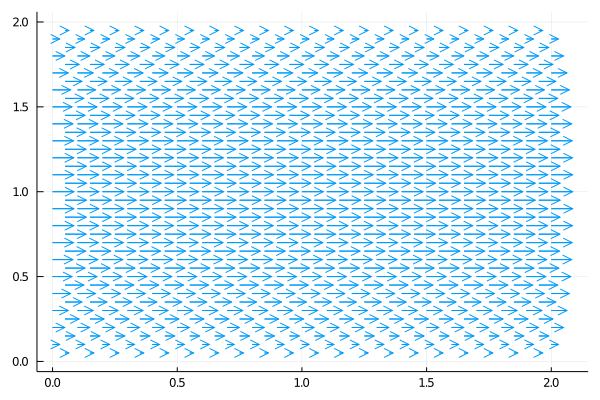

In [7]:
meshgrid(x, y) = (repeat(x, outer=length(y)), repeat(y, inner=length(x)))
X, Y = meshgrid(x,y)
u = vec(u)
v = vec(v)
quiver(Y[1:2:end],X[1:2:end], quiver=(0.1 .* u[1:2:end],0.1 .* v[1:2:end]))

The structures in the `quiver` command that look like `[::3, ::3]` are useful when dealing with large amounts of data that you want to visualize.  The one used above tells `matplotlib` to only plot every 3rd data point.  If we leave it out, you can see that the results can appear a little crowded.  

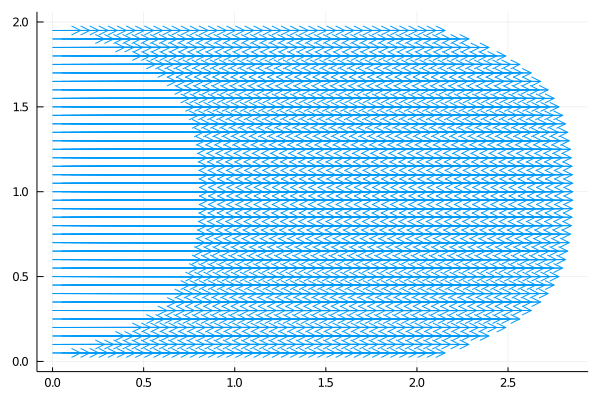

In [8]:
quiver(Y,X, quiver=(u,v))

## Learn more
***

##### What is the meaning of the $F$ term?

Step 12 is an exercise demonstrating the problem of flow in a channel or pipe. If you recall from your fluid mechanics class, a specified pressure gradient is what drives Poisseulle flow. 

Recall the $x$-momentum equation:

$$\frac{\partial u}{\partial t}+u \cdot \nabla u = -\frac{\partial p}{\partial x}+\nu \nabla^2 u$$

What we actually do in Step 12 is split the pressure into steady and unsteady components $p=P+p'$. The applied steady pressure gradient is the constant $-\frac{\partial P}{\partial x}=F$ (interpreted as a source term), and the unsteady component is $\frac{\partial p'}{\partial x}$. So the pressure that we solve for in Step 12 is actually $p'$, which for a steady flow is in fact equal to zero everywhere.

<b>Why did we do this?</b>

Note that we use periodic boundary conditions for this flow. For a flow with a constant pressure gradient, the value of pressure on the left edge of the domain must be different from the pressure at the right edge. So we cannot apply periodic boundary conditions on the pressure directly. It is easier to fix the gradient and then solve for the perturbations in pressure.

<b>Shouldn't we always expect a uniform/constant $p'$ then?</b>

That's true only in the case of steady laminar flows. At high Reynolds numbers, flows in channels can become turbulent, and we will see unsteady fluctuations in the pressure, which will result in non-zero values for $p'$. 

In step 12, note that the pressure field itself is not constant, but it's the pressure perturbation field that is. The pressure field varies linearly along the channel with slope equal to the pressure gradient. Also, for incompressible flows, the absolute value of the pressure is inconsequential.


##### And explore more CFD materials online

The interactive module **12 steps to Navier–Stokes** is one of several components of the Computational Fluid Dynamics class taught by Prof. Lorena A. Barba in Boston University between 2009 and 2013. 

For a sample of what the othe components of this class are, you can explore the **Resources** section of the Spring 2013 version of [the course's Piazza site](https://piazza.com/bu/spring2013/me702/resources).

***